# Análise de dados da final da libertadores entre Botafogo 3 x 1 Atletico MG

### Autor: Victor Miguel de Souza Soares

## Qual é o motivo de fazer essa análise? Quem são os beneficiados?

Os principais beneficiados com uma análise de dados de scouts em uma partida de futebol são os treinadores, jogadores, e equipes técnicas. Os treinadores podem usar os dados para ajustar táticas, identificar pontos fortes e fracos do time adversário e tomar decisões estratégicas em tempo real. Para os jogadores, os scouts ajudam a entender seu desempenho individual, destacando áreas para melhorar e contribuindo para a evolução técnica e física. Já as equipes técnicas podem aproveitar essas informações para planejar treinamentos mais eficazes, prevenir lesões e otimizar o desempenho coletivo. Além disso, analistas esportivos e gestores também podem usar os dados para tomadas de decisões relacionadas a contratações e investimentos.

## Como conseguir dados relevantes para análise?
Para realizar uma análise eficaz de uma partida de futebol, é fundamental obter dados relevantes e precisos, que possam fornecer insights sobre o desempenho das equipes e jogadores, mas como consegui-los? A técnica de web scraping surge como uma solução eficiente para coletar esses dados automaticamente de sites especializados, transformando informações não estruturadas em dados organizados e úteis.

Nesta análise de dados, foram utilizadas três abordagens diferentes de web scraping para obter dados do site Sofascore sobre a final da Libertadores entre Atlético MG x Botafogo realizada em 30/11/2024 às 17:00.

# Visão geral da partida

### Através da técnica de webscraping, os dados dos site sofascore serão extraídos e armazenados em um Data Frame para seu tratamento e análise

In [137]:
# Importando bibliotecas

import pandas as pd
import requests

In [138]:
url = "https://www.sofascore.com/api/v1/event/12375366/statistics"

# header simulando navegador
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0"
}

response = requests.get(url, headers=header)

if response.status_code == 200:
    data = response.json()

    all_data = []

    for match_stats in data['statistics']:
        period = match_stats['period']

        for group in match_stats['groups']:
            group_name = group['groupName']

            for item in group['statisticsItems']:
                stat_name = item.get('name')
                home_value = item.get('home')
                away_value = item.get('away')

                all_data.append({
                    'Period' : period,
                    'Group' : group_name,
                    'Statistics' : stat_name,
                    'Home' : home_value,
                    'Away' : away_value

                })

# Cria dataframe
df = pd.DataFrame(all_data)
arquivo_excel = 'futebol_stats.xlsx'
df.to_excel(arquivo_excel, index=False)

print(f'Dados exportados para {arquivo_excel}')

Dados exportados para futebol_stats.xlsx


In [139]:
# Observando df criado
df

,Period,Group,Statistics,Home,Away
0,ALL,Match overview,Ball possession,80%,20%
1,ALL,Match overview,Expected goals,1.72,1.81
2,ALL,Match overview,Big chances,3,3
3,ALL,Match overview,Total shots,22,8
4,ALL,Match overview,Goalkeeper saves,1,3
...,...,...,...,...,...
123,2ND,Defending,Interceptions,2,1
124,2ND,Defending,Recoveries,19,12
125,2ND,Defending,Clearances,6,22
126,2ND,Goalkeeping,Total saves,0,1


In [140]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Period      128 non-null    object
 1   Group       128 non-null    object
 2   Statistics  128 non-null    object
 3   Home        128 non-null    object
 4   Away        128 non-null    object
dtypes: object(5)
memory usage: 5.1+ KB


Index(['Period', 'Group', 'Statistics', 'Home', 'Away'], dtype='object')

### Nota-se que as colunas são do tipo object, e é necessário padronizá-las para um tipo inteiro para sua manipulação

In [141]:
# Função que converte colunas para tipo float e formata colunas com porcentagens isoladas e mescladas
import re

def convert_to_float(value):
    """
    Converte valores no formato string para float.
    Aceita formatos como '80%', '141/175 (81%)', e números simples.
    """
    if isinstance(value, str):
        # Extrair a porcentagem caso exista
        match = re.search(r'(\d+)%', value)
        if match:
            return float(match.group(1)) / 100
        # Caso contrário, tente converter diretamente para float
        try:
            return float(value)
        except ValueError:
            return None
    return value

# Aplicar a função nas colunas Home e Away
df['Home'] = df['Home'].apply(convert_to_float)
df['Away'] = df['Away'].apply(convert_to_float)

# Verificar o resultado
df.head()


,Period,Group,Statistics,Home,Away
0,ALL,Match overview,Ball possession,0.80,0.20
1,ALL,Match overview,Expected goals,1.72,1.81
2,ALL,Match overview,Big chances,3.00,3.00
3,ALL,Match overview,Total shots,22.00,8.00
4,ALL,Match overview,Goalkeeper saves,1.00,3.00


In [142]:
# Usando loc para selecionar linhas onde 'Period' é igual a 'ALL', para analisar dados dos dois tempos de uma só vez
result = df.loc[df['Period'] == 'ALL']

display(result)

,Period,Group,Statistics,Home,Away
0,ALL,Match overview,Ball possession,0.80,0.20
1,ALL,Match overview,Expected goals,1.72,1.81
2,ALL,Match overview,Big chances,3.00,3.00
3,ALL,Match overview,Total shots,22.00,8.00
4,ALL,Match overview,Goalkeeper saves,1.00,3.00
5,ALL,Match overview,Corner kicks,7.00,0.00
6,ALL,Match overview,Fouls,12.00,9.00
7,ALL,Match overview,Passes,547.00,141.00
8,ALL,Match overview,Tackles,14.00,12.00
9,ALL,Match overview,Free kicks,9.00,11.00


In [143]:
# Checando transformação
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Period      48 non-null     object 
 1   Group       48 non-null     object 
 2   Statistics  48 non-null     object 
 3   Home        48 non-null     float64
 4   Away        48 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.2+ KB


## Analisando estatisticas gerais

In [147]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Match overview']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Home', 'Away'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Home vs Away) - Match Overview",
        showlegend=False
    )

    # Exibir a figura
    fig.show()

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)


## Informações que podemos tirar dos gráficos:
* O Botafogo entrou na partida como favorito, com uma expectativa de 1,81 gols, superando seu adversário
##### Mas o Atlético, apesar do não favoritismo, liderou a maioria das estatísticas. O que pode ter lavado a isso? Isso refletiu no placar?
* Atlético liderou as estatísticas de Passe (547 x 141) ; Desarme (14 x 12) ; Posse de bola (80% x 20%) ; Finalizações (22 x 8) ; Escanteios (7 x 0)

##### Um dos motivadores para esse cenário de jogo pode ser visto no gráfico de cartões vermelhos, onde o Botafogo ficou com menos um jogador desde o início da partida
##### Toda essa vantagem não se traduziu no placar, como isso pode ser explicado?
* É possível perceber que o número de chances perigosas ficou empatado em 3 x 3, o Botafogo se mostrou muito mais eficaz com a bola, uma vez que:
* Precisou 4 vezes à menos de posse de bola em relação ao adversário para converter 3 gols
* Teve uma precisão de 100% nas suas grandes chances, enquanto o Atlético teve um aproveitamento de cerca de 33,33%
* E em relação do aproveitamento ao total de chutes, a diferença é ainda mais gritante, o aproveitamento do Botafogo foi de 37,5%, já o Atlético teve o número de 4,55%

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Shots']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Home', 'Away'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Home vs Away) - Atack",
        showlegend=False
    )

    # Exibir a figura
    fig.show()

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)


In [148]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Attack']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Home', 'Away'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Home vs Away) - Match Overview",
        showlegend=False
    )

    # Exibir a figura
    fig.show()

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)


In [150]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Passes']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Home', 'Away'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Home vs Away) - Match Overview",
        showlegend=False
    )

    # Exibir a figura
    fig.show()

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)


In [151]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Duels']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Home', 'Away'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Home vs Away) - Match Overview",
        showlegend=False
    )

    # Exibir a figura
    fig.show()

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)


In [152]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Defending']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Home', 'Away'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Home vs Away) - Match Overview",
        showlegend=False
    )

    # Exibir a figura
    fig.show()

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)


In [153]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a função para gerar múltiplos gráficos em uma única figura interativa
def create_comparative_bar_charts_single_image_plotly(df_tempo_completo_estatisticas_gerais):
    # Filtrar apenas as linhas onde Group é 'Match overview'
    filtered_df = df_tempo_completo_estatisticas_gerais[df_tempo_completo_estatisticas_gerais['Group'] == 'Goalkeeping']

    num_charts = len(filtered_df)
    cols = 3  # Número de colunas na grade
    rows = (num_charts + cols - 1) // cols  # Calcula o número de linhas necessário

    # Criar subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=filtered_df['Statistics'].tolist())

    # Adicionar cada gráfico à grade de subplots
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        col = (i % cols) + 1
        row_idx = (i // cols) + 1

        fig.add_trace(
            go.Bar(
                x=['Home', 'Away'],
                y=[row['Home'], row['Away']],
                marker_color=['black', 'gray'],
                name=row['Statistics']
            ),
            row=row_idx,
            col=col
        )

    # Atualizar layout
    fig.update_layout(
        height=rows * 300,  # Altura total ajustada ao número de linhas
        width=900,  # Largura fixa
        title_text="Comparação de Estatísticas (Home vs Away) - Match Overview",
        showlegend=False
    )

    # Exibir a figura
    fig.show()

# Gerar os gráficos
create_comparative_bar_charts_single_image_plotly(result)


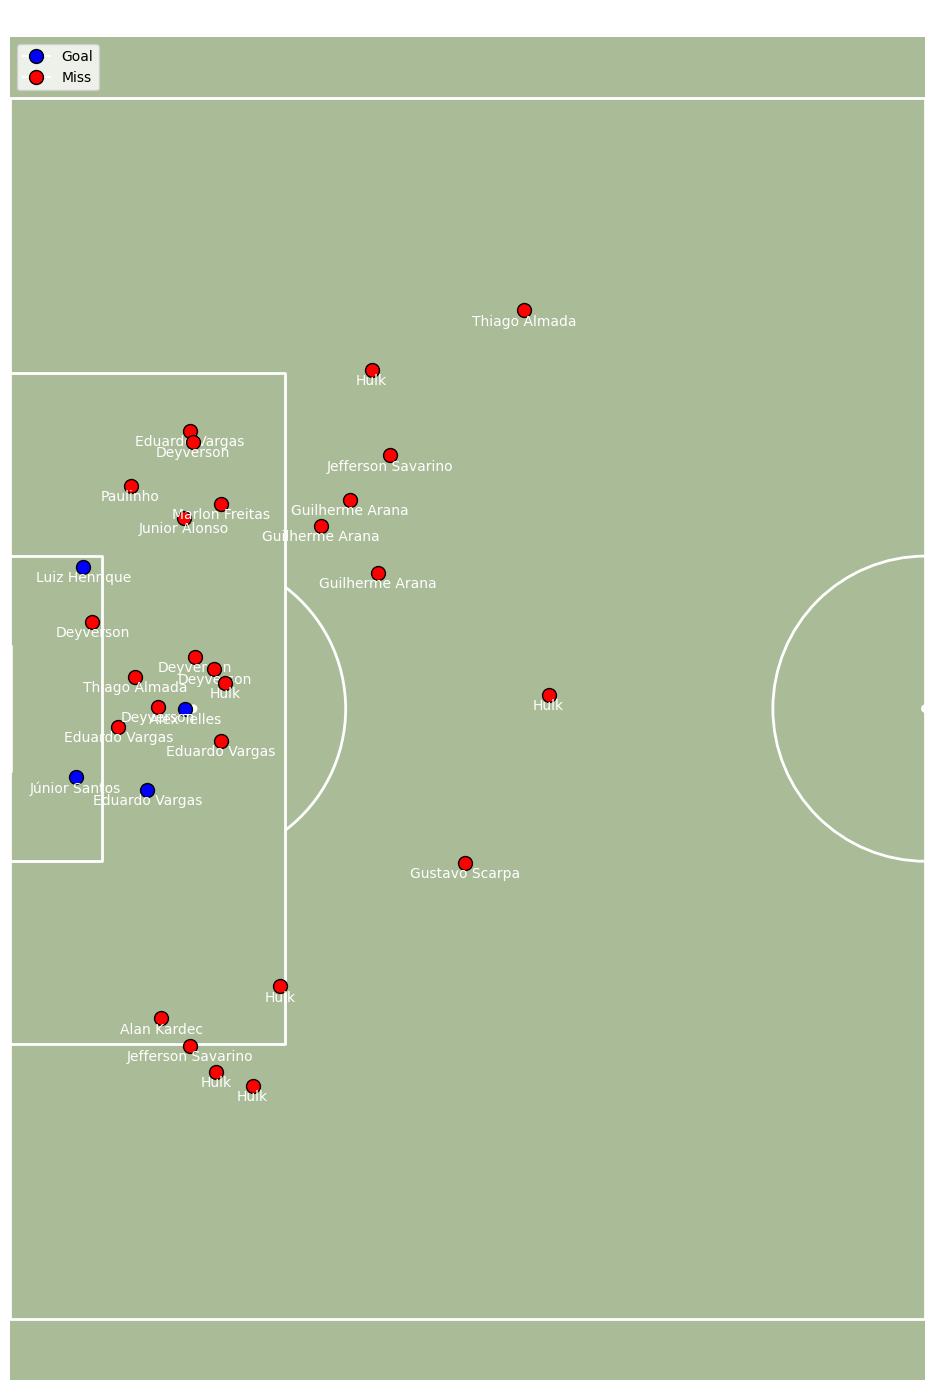

In [154]:
import json
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Carregar os dados do JSON
with open("shotmap.json", "r") as file:
    data = json.load(file)["shotmap"]

# Criar o campo de futebol
pitch = Pitch(pitch_color="#aabb97", line_color="#ffffff")
fig, ax = pitch.draw(figsize=(20, 14))

# Extrair coordenadas dos chutes e nomes dos jogadores
player_coords = [(shot["playerCoordinates"]["x"], shot["playerCoordinates"]["y"]) for shot in data]
player_names = [shot["player"]["name"] for shot in data]
shot_types = [shot["shotType"] for shot in data]

# Separar os chutes por tipo
goal_shots = [(coord, name) for coord, name, shot in zip(player_coords, player_names, shot_types) if shot == "goal"]
miss_shots = [(coord, name) for coord, name, shot in zip(player_coords, player_names, shot_types) if shot != "goal"]

# Fator de ajuste no eixo Y
y_adjustment = -10

# Adicionar os chutes de "Goal" no campo com ajuste
if goal_shots:
    for (x, y), name in goal_shots:
        y_adjusted = y + y_adjustment
        pitch.scatter([x], [y_adjusted], ax=ax, color='blue', edgecolors='black', s=100, label="Goal", zorder=3)
        ax.text(x, y_adjusted + 1, name, color='white', fontsize=10, ha='center')  # Nome do jogador

# Adicionar os chutes de "Miss" no campo com ajuste
if miss_shots:
    for (x, y), name in miss_shots:
        y_adjusted = y + y_adjustment
        pitch.scatter([x], [y_adjusted], ax=ax, color='red', edgecolors='black', s=100, label="Miss", zorder=3)
        ax.text(x, y_adjusted + 1, name, color='white', fontsize=10, ha='center')  # Nome do jogador

# Ajustar limites para cortar metade da imagem
ax.set_xlim(0, 60)  # Cortar metade direita (campo de 0 a 50 no eixo X)
#ax.set_ylim(0, 80)  # Cortar metade inferior (campo de 0 a 80 no eixo Y)

# Adicionar título e legenda
ax.set_title("Shotmap de Futebol", fontsize=18, color='white')
# Criar uma legenda única

# Adicionar título e legenda
ax.set_title("Shotmap de Futebol", fontsize=18, color='white')
# Criar uma legenda única
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Goal', markersize=10, markerfacecolor='blue', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Miss', markersize=10, markerfacecolor='red', markeredgecolor='black'),
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)
# Mostrar o gráfico
plt.show()


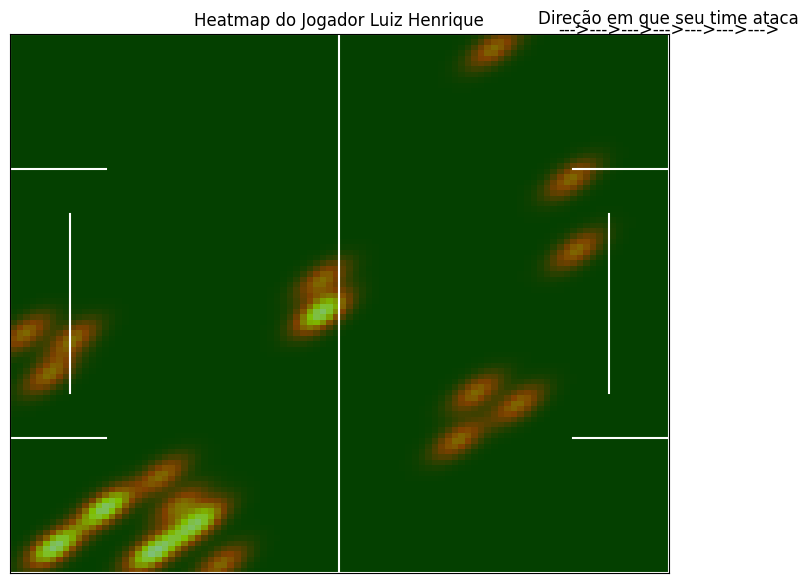

In [133]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# URL do heatmap de um jogador
url = "https://www.sofascore.com/api/v1/event/12375366/player/1035995/heatmap"

# Header simulando um navegador
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0"
}

response = requests.get(url, headers=header)

if response.status_code == 200:
    data = response.json()
    heatmap_positions = data.get("heatmap", [])
    if heatmap_positions:
        x = [pos["x"] for pos in heatmap_positions]
        y = [pos["y"] for pos in heatmap_positions]

        # Aplicando o ajuste vertical
        y_adjust = -5
        y = [coord + y_adjust for coord in y]

        if len(x) > 1 and len(y) > 1:
            # Gerar heatmap
            campo_comprimento, campo_largura = 110, 90
            kde = gaussian_kde([x, y], bw_method=0.1)
            xx, yy = np.mgrid[0:campo_comprimento:100j, 0:campo_largura:100j]
            zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

            # Visualizar
            fig, ax = plt.subplots(figsize=(10, 7))
            ax.set_xlim(0, campo_comprimento)
            ax.set_ylim(0, campo_largura)
            ax.set_facecolor("green")

            # Linhas do campo
            ax.plot([0, 0], [0, campo_largura], color="white")
            ax.plot([campo_comprimento, campo_comprimento], [0, campo_largura], color="white")
            ax.plot([0, campo_comprimento], [0, 0], color="white")
            ax.plot([0, campo_comprimento], [campo_largura, campo_largura], color="white")
            ax.plot([campo_comprimento / 2, campo_comprimento / 2], [0, campo_largura], color="white")

            # Linhas horizontais simulando as barras
            # Área pequena
            ax.plot([10, 10], [campo_largura / 3, 2 * campo_largura / 3], color="white")
            ax.plot([campo_comprimento - 10, campo_comprimento - 10], [campo_largura / 3, 2 * campo_largura / 3], color="white")

            # Área grande
            ax.plot([0, 16], [campo_largura / 4, campo_largura / 4], color="white")
            ax.plot([0, 16], [3 * campo_largura / 4, 3 * campo_largura / 4], color="white")
            ax.plot([campo_comprimento - 16, campo_comprimento], [campo_largura / 4, campo_largura / 4], color="white")
            ax.plot([campo_comprimento - 16, campo_comprimento], [3 * campo_largura / 4, 3 * campo_largura / 4], color="white")

            # Adicionando o mapa de calor
            ax.imshow(zz.T, extent=(0, campo_comprimento, 0, campo_largura), origin="lower", cmap="hot", alpha=0.5)

            # Removendo a linha do eixo X e os ticks
            ax.get_xaxis().set_visible(False)
            ax.set_xticks([])

            # Removendo os ticks do eixo Y
            ax.set_yticks([])
            # Adicionando os textos
            ax.text(campo_comprimento, campo_largura * 1.02, 'Direção em que seu time ataca',
                    fontsize=12, color='black', ha='center')
            ax.text(campo_comprimento, campo_largura * 1, '--->--->--->--->--->--->--->',
                    fontsize=12, color='black', ha='center')

            plt.title("Heatmap do Jogador Luiz Henrique")
            plt.show()
        else:
            print("Dados insuficientes para criar o mapa de calor.")
    else:
        print("Nenhuma posição encontrada no JSON.")
else:
    print(f"Erro na requisição: {response.status_code}")


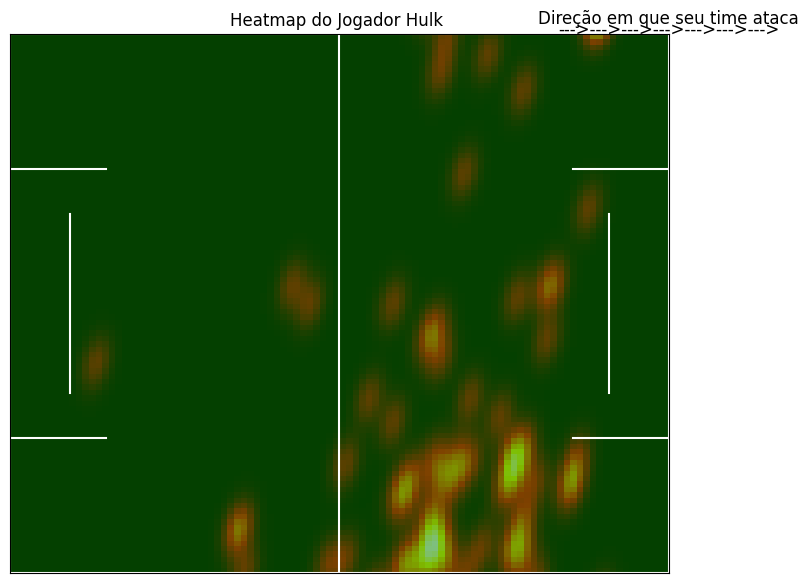

In [134]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# URL do heatmap de um jogador
url = "https://www.sofascore.com/api/v1/event/12375366/player/34705/heatmap"

# Header simulando um navegador
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0"
}

response = requests.get(url, headers=header)

if response.status_code == 200:
    data = response.json()
    heatmap_positions = data.get("heatmap", [])
    if heatmap_positions:
        x = [pos["x"] for pos in heatmap_positions]
        y = [pos["y"] for pos in heatmap_positions]

        # Aplicando o ajuste vertical
        y_adjust = -5
        y = [coord + y_adjust for coord in y]

        if len(x) > 1 and len(y) > 1:
            # Gerar heatmap
            campo_comprimento, campo_largura = 110, 90
            kde = gaussian_kde([x, y], bw_method=0.1)
            xx, yy = np.mgrid[0:campo_comprimento:100j, 0:campo_largura:100j]
            zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

            # Visualizar
            fig, ax = plt.subplots(figsize=(10, 7))
            ax.set_xlim(0, campo_comprimento)
            ax.set_ylim(0, campo_largura)
            ax.set_facecolor("green")

            # Linhas do campo
            ax.plot([0, 0], [0, campo_largura], color="white")
            ax.plot([campo_comprimento, campo_comprimento], [0, campo_largura], color="white")
            ax.plot([0, campo_comprimento], [0, 0], color="white")
            ax.plot([0, campo_comprimento], [campo_largura, campo_largura], color="white")
            ax.plot([campo_comprimento / 2, campo_comprimento / 2], [0, campo_largura], color="white")

            # Linhas horizontais simulando as barras
            # Área pequena
            ax.plot([10, 10], [campo_largura / 3, 2 * campo_largura / 3], color="white")
            ax.plot([campo_comprimento - 10, campo_comprimento - 10], [campo_largura / 3, 2 * campo_largura / 3], color="white")

            # Área grande
            ax.plot([0, 16], [campo_largura / 4, campo_largura / 4], color="white")
            ax.plot([0, 16], [3 * campo_largura / 4, 3 * campo_largura / 4], color="white")
            ax.plot([campo_comprimento - 16, campo_comprimento], [campo_largura / 4, campo_largura / 4], color="white")
            ax.plot([campo_comprimento - 16, campo_comprimento], [3 * campo_largura / 4, 3 * campo_largura / 4], color="white")

            # Adicionando o mapa de calor
            ax.imshow(zz.T, extent=(0, campo_comprimento, 0, campo_largura), origin="lower", cmap="hot", alpha=0.5)

            # Removendo a linha do eixo X e os ticks
            ax.get_xaxis().set_visible(False)
            ax.set_xticks([])

            # Removendo os ticks do eixo Y
            ax.set_yticks([])
            
            # Adicionando os textos
            ax.text(campo_comprimento, campo_largura * 1.02, 'Direção em que seu time ataca',
                    fontsize=12, color='black', ha='center')
            ax.text(campo_comprimento, campo_largura * 1, '--->--->--->--->--->--->--->',
                    fontsize=12, color='black', ha='center')

            plt.title("Heatmap do Jogador Hulk ")
            plt.show()
        else:
            print("Dados insuficientes para criar o mapa de calor.")
    else:
        print("Nenhuma posição encontrada no JSON.")
else:
    print(f"Erro na requisição: {response.status_code}")
